In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
len(mnist)

9

In [6]:
X,y = mnist["data"],mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
X[0].shape

(784,)

In [10]:
type(X)

numpy.ndarray

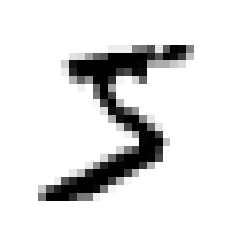

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [12]:
y[0]

'5'

In [13]:
type(y[0])

str

In [14]:
import numpy as np
y=y.astype(np.uint8)

In [15]:
type(y[0])

numpy.uint8

## Train-Test Split

In [16]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [17]:
y_train_5 = (y_train==5)
X_train_5 = (X_train==5)

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_5,y_train_5)

SGDClassifier(random_state=42)

In [19]:
some_digit.shape

(784,)

In [20]:
[some_digit].shape

AttributeError: 'list' object has no attribute 'shape'

In [21]:
sgd_clf.predict([some_digit])

array([False])

In [22]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [23]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = "accuracy")
scores

array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
        

In [25]:
from sklearn.model_selection import cross_val_score
never5= Never5Classifier()
scores =cross_val_score(never5,X_train,y_train_5,cv=3,scoring = "accuracy")
scores

array([0.91125, 0.90855, 0.90915])

In [26]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)
predictions

array([ True, False, False, ...,  True, False, False])

In [27]:
preditions.shape

NameError: name 'preditions' is not defined

## Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,predictions)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,preditions)

In [ ]:
recall_score(y_train_5,preditions)

## Precision and recall

In [28]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,predictions)

0.7547327860613168

In [29]:
recall_score(y_train_5,predictions)

0.8310274857037447

## Precision/Recall Trade off

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-177.42502901])

In [31]:
threshold =0

In [32]:
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred 

array([False])

In [33]:
threshold = 1500
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

## Deciding what threshold to use

In [34]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3, method = "decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [35]:
y_scores.shape

(60000,)

In [36]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [37]:
precisions.shape

(59967,)

In [38]:
recalls.shape

(59967,)

In [39]:
precisions[59965]

1.0

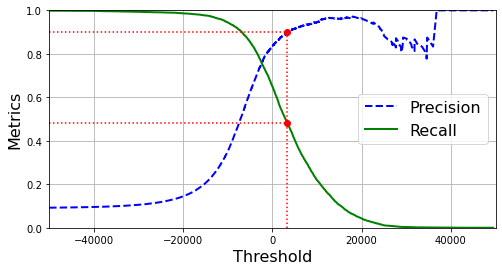

In [40]:
# using Matplotlib to plot 
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision",linewidth= 2)
    plt.plot(thresholds,recalls[:-1],"g-",label = "Recall",linewidth =2)
    plt.legend(loc ="center right", fontsize = 16)
    plt.xlabel("Threshold",fontsize=16)
    plt.ylabel("Metrics",fontsize = 16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
recall_90_precision = recalls[np.argmax(precisions>=0.9)]
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision,threshold_90_precision],[0.,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[0.9,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")


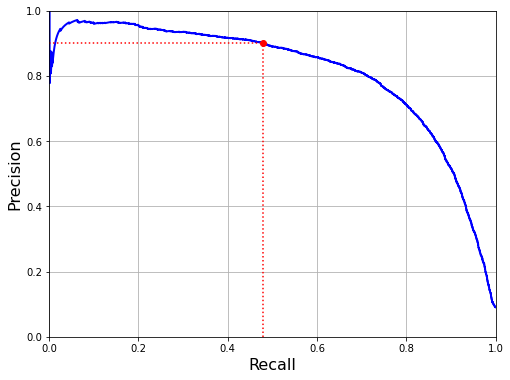

In [41]:
def plot_precision_vs_recall (precisions,recalls):
    plt.plot(recalls,precisions,"b-",linewidth=2)
    plt.xlabel("Recall",fontsize=16)
    plt.ylabel("Precision",fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.plot([0,recall_90_precision],[0.9,0.9],"r:")
plt.plot([recall_90_precision,recall_90_precision],[0,0.9],"r:")
plt.plot([recall_90_precision],[0.9],"ro")

In [42]:
#choosing a threshold for 90% precision
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
threshold_90_precision

3370.0194991439557

In [43]:
#checking predictions and recalls
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [44]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [45]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

## The ROC Curve

In [46]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

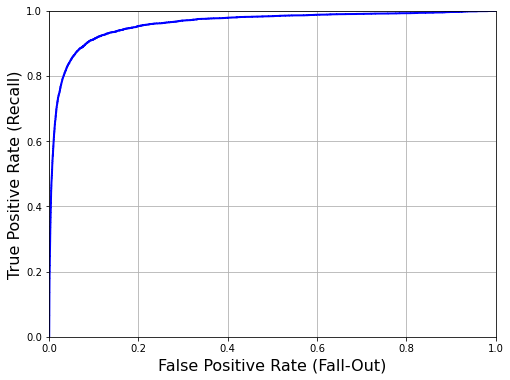

In [48]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,"b-",linewidth = 2, label = label)
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (Fall-Out)",fontsize = 16)
    plt.ylabel("True Positive Rate (Recall)",fontsize =16)
    plt.grid(True)
plt.figure(figsize =(8,6))
plot_roc_curve(fpr,tpr)

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

## Random forest classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_scores = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method= "predict_proba",verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.4s finished


In [53]:
forest_scores =y_probas_scores[:,1]

In [54]:
forest_fpr,forest_tpr,forest_thresholds = roc_curve(y_train_5,forest_scores)

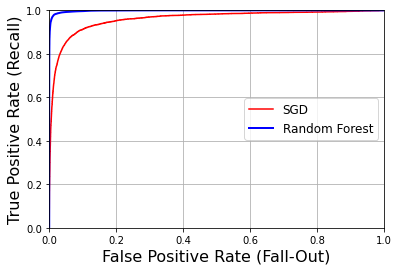

In [56]:
#comparing SGD classifier and randomforest classifier
plt.plot(fpr,tpr,"r-",label = "SGD")
plot_roc_curve(forest_fpr,forest_tpr,label = "Random Forest")
plt.legend(loc = "center right", fontsize= 12)

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,forest_scores)

0.9983436731328145

In [62]:
forest_pred = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
forest_pred

array([ True, False, False, ...,  True, False, False])

In [63]:
forest_pred.shape

(60000,)

In [61]:
precision_score(y_train_5,forest_pred)

0.9905083315756169

In [65]:
recall_score(y_train_5,forest_pred)

0.8662608374838591

## Multiclass Classification

In [67]:
from sklearn.svm import SVC
svm_clf= SVC()
svm_clf.fit(X_train,y_train)

SVC()

In [68]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [70]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [73]:
from sklearn.linear_model import SGDClassifier
sgd_clf1 = SGDClassifier()
sgd_clf1.fit(X_train,y_train)

SGDClassifier()

In [75]:
scores_sgd_some_digit=sgd_clf1.decision_function([some_digit])

In [77]:
np.argmax(scores_sgd_some_digit)

5

In [78]:
accuracy_scores = cross_val_score(sgd_clf1,X_train,y_train,cv=3,scoring = "accuracy",verbose =2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] END .................................................... total time= 1.4min
[CV] END .................................................... total time= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min finished


In [83]:
accuracy_scores

array([0.8749 , 0.88   , 0.88305])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [81]:
sgd_clf1.fit(X_train_scaled,y_train)

SGDClassifier()

In [89]:
accuracy_scores2 = cross_val_score(sgd_clf1,X_train_scaled,y_train,cv=3,scoring = "accuracy",verbose =2,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.2min finished


In [90]:
accuracy_scores2

array([0.90375, 0.894  , 0.90495])

In [91]:
y_pred_sgd = cross_val_predict(sgd_clf1,X_train_scaled,y_train,cv=3,n_jobs=-1)

In [92]:
y_pred_sgd

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [98]:
from sklearn.metrics import confusion_matrix
conf_matrix_sgd1= confusion_matrix(y_train,y_pred_sgd)

In [99]:
conf_matrix_sgd1

array([[5581,    0,   25,    7,    9,   51,   38,    6,  205,    1],
       [   0, 6404,   38,   24,    5,   46,    4,    7,  202,   12],
       [  28,   27, 5239,   97,   71,   28,   66,   38,  353,   11],
       [  21,   17,  121, 5251,    2,  213,   26,   38,  368,   74],
       [  11,   14,   44,   12, 5197,   12,   38,   25,  315,  174],
       [  27,   16,   31,  168,   54, 4491,   75,   14,  484,   61],
       [  29,   16,   45,    3,   44,   97, 5551,    4,  128,    1],
       [  20,    9,   53,   31,   48,   13,    3, 5712,  160,  216],
       [  16,   63,   44,   95,    3,  139,   25,   11, 5406,   49],
       [  26,   18,   31,   68,  119,   37,    1,  182,  340, 5127]],
      dtype=int64)

In [114]:
def plot_confusion_matrix(matrix):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,1,1)
    cax= ax.matshow(matrix,cmap='Blues')
    fig.colorbar(cax)
    plt.xlabel("Actual Classes")
    plt.ylabel("Predicted Classes")

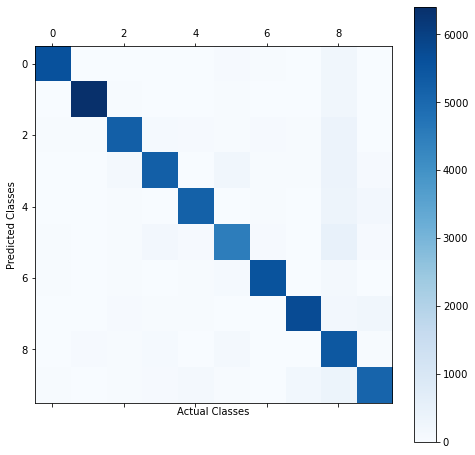

In [115]:
plot_confusion_matrix(conf_matrix_sgd1)

In [104]:
row_sums = conf_matrix_sgd1.sum(axis=1,keepdims=True)
normlized_conf_mx= conf_matrix_sgd1/row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

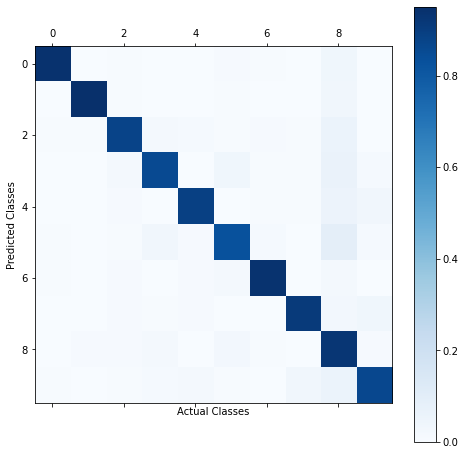

In [116]:
plot_confusion_matrix(normlized_conf_mx)

## Multilabel Classification

In [117]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [118]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [119]:
knn_clf.predict([some_digit])

array([[False,  True]])

## Evaluate a multilabel classifier

In [120]:
#compute F1 score
y_multilabel_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3,n_jobs=-1,verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


In [121]:
from sklearn.metrics import f1_score
f1_score(y_multilabel,y_multilabel_pred,average = "macro")

0.976410265560605

In [122]:
from sklearn.metrics import f1_score
f1_score(y_multilabel,y_multilabel_pred,average = "weighted")

0.9778357403921755

## Multioutput Classification

In [126]:
noise = np.random.randint(1,100,(len(X_train),784))
X_train_mod = X_train +noise
noise = np.random.randint(1,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod=X_test

In [127]:
knn_clf.fit(X_test_mod,y_test_mod)

KNeighborsClassifier()

In [129]:
y_train.shape

(60000,)

# Extra materials

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()
param_grid = [
    {"n_neighbors":np.arange(1,11,1), "weights":["uniform","distance"]}
]
knn_grid_search = GridSearchCV(knn_clf,param_grid,scoring = "accuracy", n_jobs=-1,verbose =3)
knn_grid_search.fit(X_train,y_train)

## Data augmentation

In [131]:
from scipy.ndimage.interpolation import shift

In [157]:
def shift_image(image,dx,dy):
    image= image.reshape((28,28))
    shifted_image = shift(image,[dy,dx])
    return shifted_image.reshape([-1])



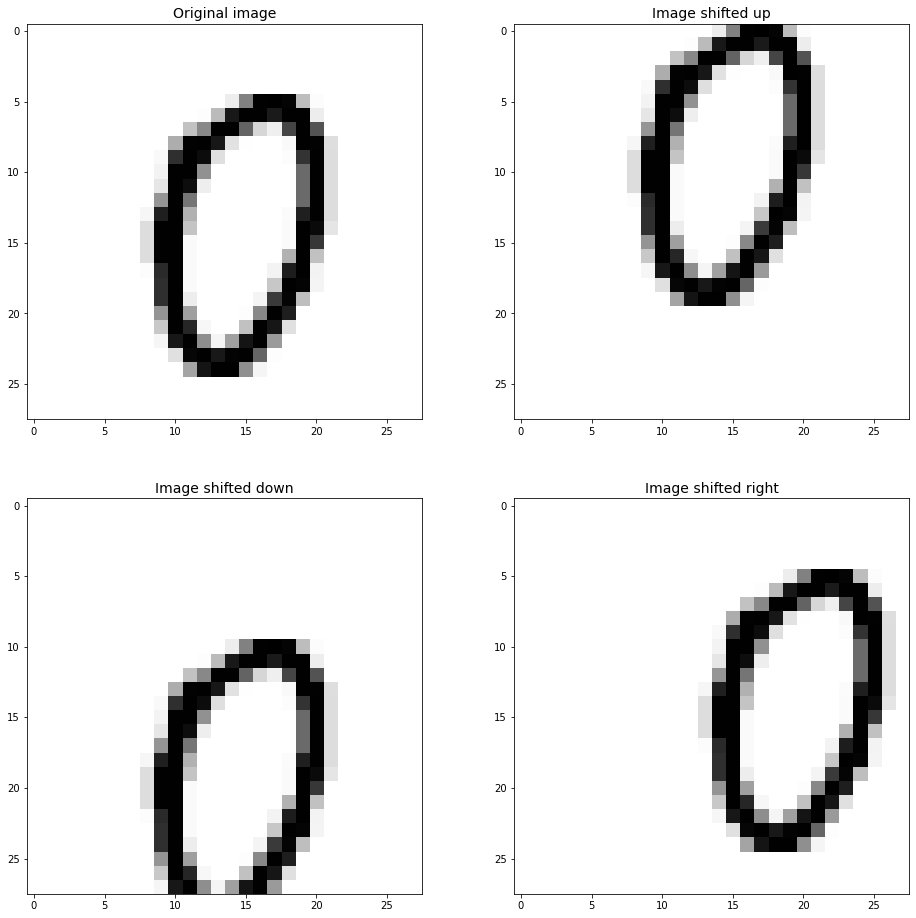

In [158]:
image=X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_up = shift_image(image,0,-5)
shifted_image_right = shift_image(image,5,0)
shifted_image_left = shift_image(image,-5,0)
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title("Original image",fontsize =14)
plt.imshow(image.reshape(28,28),interpolation="nearest",cmap = "Greys")
plt.subplot(222)
plt.title("Image shifted up",fontsize =14)
plt.imshow(shifted_image_up.reshape(28,28),interpolation="nearest",cmap = "Greys")
plt.subplot(223)
plt.title("Image shifted down",fontsize =14)
plt.imshow(shifted_image_down.reshape(28,28),interpolation="nearest",cmap = "Greys")
plt.subplot(224)
plt.title("Image shifted right",fontsize =14)
plt.imshow(shifted_image_right.reshape(28,28),interpolation="nearest",cmap = "Greys")

In [159]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(label)
X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)

In [162]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [164]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [173]:
y_pred = knn_clf.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9763

## Titanic Dataset

In [177]:
import os
import urllib.request
import pandas as pd
TITANIC_PATH = os.path.join("datasets","titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"
def fetch_titanic_dataset(Download_url = DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv","test.csv"):
        filepath = os.path.join(path,filename)
        if not os.path.isfile(filepath):
            print("Downloading",filename)
            urllib.request.urlretrieve(Download_url+filename,filepath)
            

In [178]:
fetch_titanic_dataset()

In [179]:
def load_titanic_dataset(filename,path= TITANIC_PATH):
    csv_path = os.path.join(path,filename)
    return pd.read_csv(csv_path)

In [180]:
train_dataset=load_titanic_dataset("train.csv")
test_dataset = load_titanic_dataset("test.csv")

In [181]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
train_dataset=train_dataset.set_index("PassengerId")

In [285]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<AxesSubplot:>

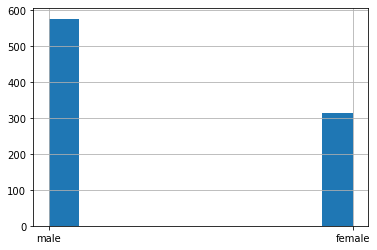

In [185]:
train_dataset["Sex"].hist()

<AxesSubplot:>

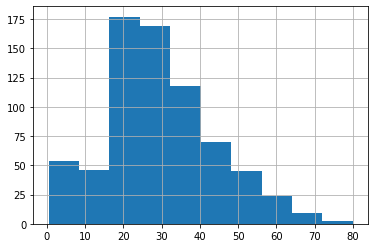

In [188]:
train_dataset["Age"].hist()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

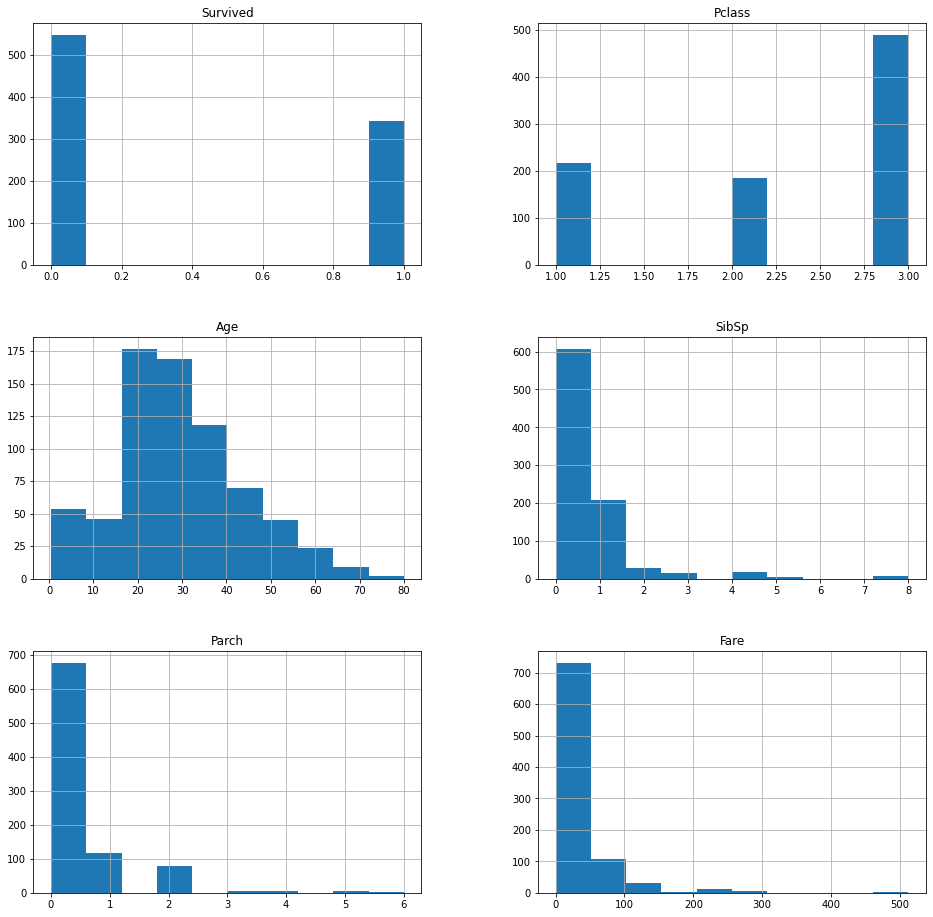

In [192]:
train_dataset.hist(column = ["Survived","Pclass","Age","SibSp","Parch","Fare"],figsize=(16,16))

In [197]:
corr_matrix = train_dataset.corr(method="spearman")
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.323736
Parch          0.138266
SibSp          0.088879
PassengerId   -0.005007
Age           -0.052565
Pclass        -0.339668
Name: Survived, dtype: float64

## Making a copy and age analysis

In [198]:
train_dataset_age_cat = train_dataset.copy()

In [210]:
def age_by_class(df):
    df["Age"].fillna(df.groupby(['Sex','Pclass'])['Age'].transform('median'),inplace=True)
    return df

In [236]:
from sklearn.base import BaseEstimator, TransformerMixin
class AgeByClass (BaseEstimator,TransformerMixin):
    def __init__(self,compute_age = True):
        self.compute_age = compute_age
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X["Age"].fillna(X.groupby(['Sex','Pclass'])['Age'].transform('median'),inplace=True)
        return X

In [243]:
attr_changer = AgeByClass()
data_with_age = attr_changer.fit_transform(train_dataset)

In [240]:
data_with_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocessing Pipelines

In [250]:
#numerical attributes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy = "median")),("Scaler",StandardScaler())
])
scaler_pipeline =Pipeline([
    ("Scaler_2",StandardScaler())
])
age_pipeline = Pipeline([
    ("Age_filler",AgeByClass())
])

In [264]:
from sklearn.preprocessing import OneHotEncoder
    
cat_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_encoder",OneHotEncoder(sparse=False))
])

In [327]:
from sklearn.compose import ColumnTransformer
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
attribs_required_by_age = ["Age","Sex","Pclass"]
full_pipeline1 = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',cat_pipeline,cat_attribs)
])
full_pipeline2 = ColumnTransformer([
    ("age_filler",age_pipeline,attribs_required_by_age),
    ('cat',cat_pipeline,cat_attribs)
])

In [311]:
X_train1 = full_pipeline.fit_transform(train_dataset[num_attribs+cat_attribs])


In [331]:
X_train2 = full_pipeline2.fit_transform(train_dataset[num_attribs+cat_attribs])

In [349]:
X_train2[:,1]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [314]:
X_train1

array([[-0.53489056,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66839163,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.23407001, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.57249313,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.23407001, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.21716081, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [340]:
X_train2[:,0]-list(data_with_age["Age"])

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [338]:
list(data_with_age["Age"]).

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25.0,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 30.0,
 31.0,
 21.5,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25.0,
 19.0,
 21.5,
 25.0,
 40.0,
 35.0,
 21.5,
 66.0,
 28.0,
 42.0,
 25.0,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25.0,
 3.0,
 19.0,
 25.0,
 25.0,
 21.5,
 25.0,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 40.0,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 40.0,
 25.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25.0,
 25.0,
 0.8333,
 30.0,
 22.0,
 29.0,
 21.5,
 28.0,
 17.0,
 33.0,
 16.0,
 25.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25.0,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 25.0,
 38.0,
 21.5,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 25.0,
 32.5,
 32.5,
 54.0,
 12.0,
 25.0,
 24.0,
 21.5,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 21.5,
 22.0,
 24.0,
 19.0,

In [292]:
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,21.5,1,2,W./C. 6607,23.4500,NaN,S


In [299]:
y_train = train_dataset["Survived"]

In [300]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train1,y_train)

RandomForestClassifier(random_state=42)

In [301]:
from sklearn.ensemble import RandomForestClassifier
forest_clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf1.fit(X_train2,y_train)

RandomForestClassifier(random_state=42)

In [302]:
from sklearn.model_selection import cross_val_score
forest_score_median_age = cross_val_score(forest_clf,X_train1,y_train,cv=10)


In [318]:
forest_score_median_age.mean()

0.8148938826466917

In [304]:
from sklearn.model_selection import cross_val_score
forest1_score_median_age = cross_val_score(forest_clf1,X_train1,y_train,cv=10)

In [319]:
forest1_score_median_age.mean()

0.8148938826466917

In [315]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train1,y_train)

AdaBoostClassifier()

In [320]:
from sklearn.model_selection import cross_val_score
ada_score_median_age = cross_val_score(ada_clf,X_train2,y_train,cv=10)

In [321]:
ada_score_median_age.mean()

0.8114856429463171

In [322]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train1,y_train)

GradientBoostingClassifier()

In [325]:
from sklearn.model_selection import cross_val_score
grad_score = cross_val_score(grad_clf,X_train1,y_train,cv=10)

In [326]:
grad_score.mean()

0.828302122347066